In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import wquantiles
from statsmodels import robust
from scipy.stats import trim_mean

In [3]:
state = pd.read_csv('./data/state.csv')

In [4]:
mean = float(state['Population'].mean())
trimmed_mean = float(trim_mean(state['Population'], 0.1))
median = float(state['Population'].median())
weighted_mean = float(np.average(state['Murder.Rate'], weights=state['Population']))
weighted_median = float(wquantiles.median(state['Murder.Rate'], weights=state['Population']))
print(f'Mean: {mean}')
print(f'Trimmed mean: {trimmed_mean}')
print(f'Median: {median}')
print(f'Weighted mean: {weighted_mean}')
print(f'Weighted median: {weighted_median}')

Mean: 6162876.3
Trimmed mean: 4783697.125
Median: 4436369.5
Weighted mean: 4.445833981123393
Weighted median: 4.4


In [5]:
std = float(state['Population'].std())
iqr = float(state['Population'].quantile(0.75)) - float(state['Population'].quantile(0.25))
mad = float(robust.scale.mad(state['Population']))
print(f'Std dev: {std}')
print(f'IQR: {iqr}')
print(f'MAD: {mad}')

Std dev: 6848235.347401142
IQR: 4847308.0
MAD: 3849876.1459979336


In [6]:
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

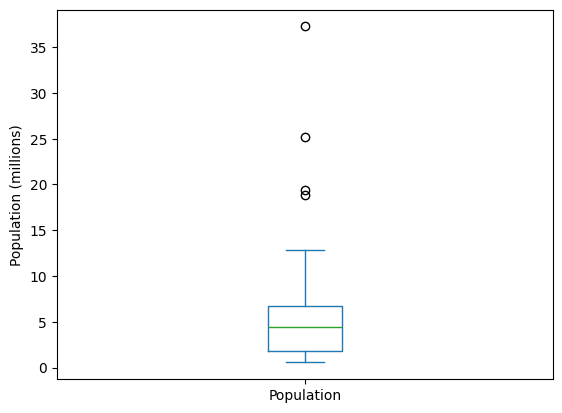

In [7]:
ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')

In [8]:
binnedPopulation = pd.cut(state['Population'], bins=10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0.5, 0, 'Population (millions)')

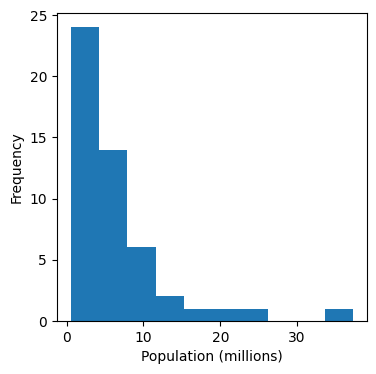

In [9]:
ax = (state['Population']/1000000).plot.hist(figsize = (4,4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

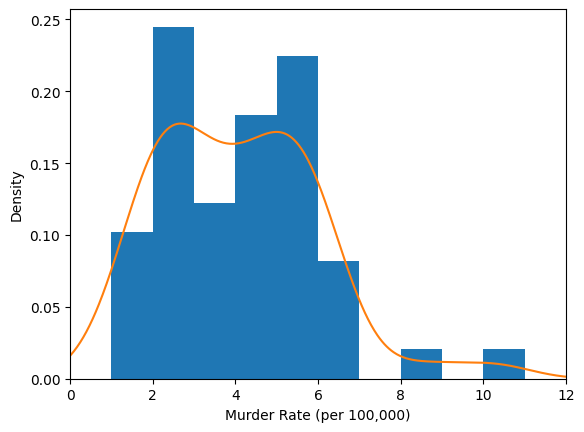

In [10]:
ax = state['Murder.Rate'].plot.hist(density = True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

Text(0, 0.5, 'Count')

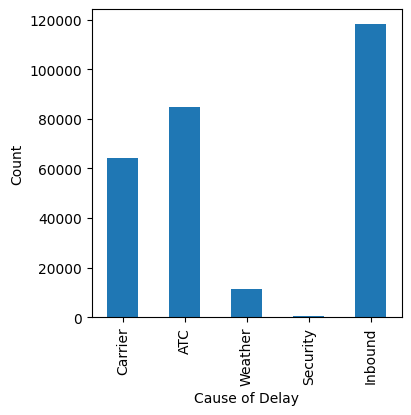

In [12]:
dfw = pd.read_csv('./data/dfw_airline.csv')
ax = dfw.transpose().plot.bar(figsize=(4,4),legend=False)
ax.set_xlabel('Cause of Delay')
ax.set_ylabel('Count')